# _Generalized linear models_
(target-glm)=
Stel dat we te maken hebben met een target variabele die in plaats van een continue waarde (bv. hoeveelheid fooi), _binair_ is (bv. laat iemand een tip achter $[1]$ of niet $[1]$). In een dergelijke situatie zouden we nog steeds predicties willen kunnen maken op basis van een lineaire combinatie van features/predictoren, maar we kunnen een standaard lineair regressie model niet zomaar toepassen. Dat model houdt enkel rekening met continue targetvariabele, dus met predicties die groter dan $1$ of kleiner dan $0$. Een oplossing hiervoor is om het lineaire model via een speciale niet-lineaire functie te _linken_ aan de target waarden ($0$ of $1$ in het binaire geval). Om predicties te mappen op binaire outputs wordt een _sigmoid_ (S-vormige) functie gebruikt zoals de logistische functie. In dit laatste geval spreken we over **logistische regressie**. In het algemene geval waarbij we **lineaire predicties mappen op niet-continue targetvariabelen via een welbepaalde link-functie spreekt men van _generalized linear models_ (GLM)**. Hier gaan we enkel verder in op _logistische regressie_ omdat het een aanzet geeft naar de parameter schattingen bij neurale netwerken.

(target-logistic-regression)=
## Logistische regressie

Bij logistische regressie hebben te maken met **binaire target variabelen**:

$$
y_i \isin [0, 1]
$$

De lineaire predicties worden in het interval $[0, 1]$ geprojecteerd door de logistische link functie.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib.patches import Patch

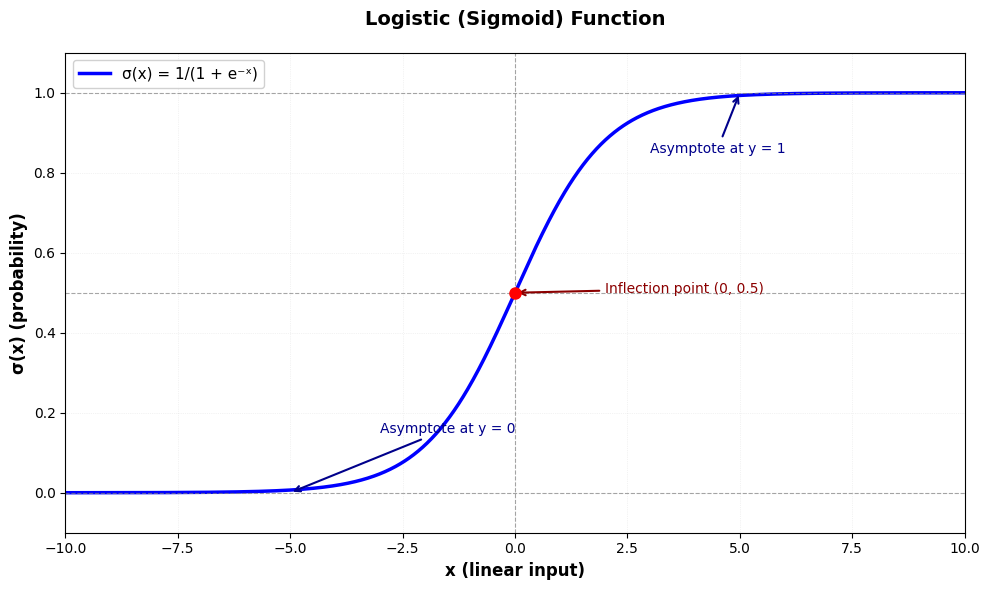

In [2]:
# Create figure with specific size
fig, ax = plt.subplots(figsize=(10, 6))

# Generate x values
x = np.linspace(-10, 10, 1000)


# Define the logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))


# Calculate y values
y = logistic(x)

# Plot the logistic curve
ax.plot(x, y, "b-", linewidth=2.5, label="σ(x) = 1/(1 + e⁻ˣ)")

# Add horizontal lines at y=0, y=0.5, and y=1
ax.axhline(y=0, color="gray", linestyle="--", linewidth=0.8, alpha=0.7)
ax.axhline(y=0.5, color="gray", linestyle="--", linewidth=0.8, alpha=0.7)
ax.axhline(y=1, color="gray", linestyle="--", linewidth=0.8, alpha=0.7)

# Add vertical line at x=0
ax.axvline(x=0, color="gray", linestyle="--", linewidth=0.8, alpha=0.7)

# Highlight the point at (0, 0.5)
ax.plot(0, 0.5, "ro", markersize=8, zorder=5)

# Set labels and title
ax.set_xlabel("x (linear input)", fontsize=12, fontweight="bold")
ax.set_ylabel("σ(x) (probability)", fontsize=12, fontweight="bold")
ax.set_title("Logistic (Sigmoid) Function", fontsize=14, fontweight="bold", pad=20)

# Set axis limits
ax.set_xlim(-10, 10)
ax.set_ylim(-0.1, 1.1)

# Add grid
ax.grid(True, alpha=0.3, linestyle=":", linewidth=0.5)

# Add legend
ax.legend(loc="upper left", fontsize=11, framealpha=0.9)

# Add annotations
ax.annotate(
    "Asymptote at y = 1",
    xy=(5, 1),
    xytext=(3, 0.85),
    fontsize=10,
    color="darkblue",
    arrowprops={"arrowstyle": "->", "color": "darkblue", "lw": 1.5},
)

ax.annotate(
    "Asymptote at y = 0",
    xy=(-5, 0),
    xytext=(-3, 0.15),
    fontsize=10,
    color="darkblue",
    arrowprops={"arrowstyle": "->", "color": "darkblue", "lw": 1.5},
)

ax.annotate(
    "Inflection point (0, 0.5)",
    xy=(0, 0.5),
    xytext=(2, 0.5),
    fontsize=10,
    color="darkred",
    arrowprops={"arrowstyle": "->", "color": "darkred", "lw": 1.5},
)

# Adjust layout
plt.tight_layout()
plt.show()

### Model

Het gekende lineaire regressie model wordt uitgebreid met een logistische link-functie zodat we voor de schatting van de target waarden volgende formulering krijgen:

$$
\begin{align}
\pmb{\hat{y}} &= \sigma(\pmb{X}\pmb{b}) \cr
&= \frac{1}{1 + e^{-\pmb{X}\pmb{b}}}
\end{align}
$$

Zoals te zien in de illustratie hierboven, zorgt de logistische link-functie ervoor dat de voorspellingen _binnen_ het interval $[0, 1]$. Om de voorspellingen echt binair te maken $\{0, 1\}$ wordt een _decision boundary_ gebruikt - meestal bij het flexiepunt:

$$
\hat{y}_i = \begin{cases}
1 & \sigma(\pmb{x}_i^T\pmb{b}) > 0.5 \\
0 & \sigma(\pmb{x}_i^T\pmb{b}) \leq 0.5 
\end{cases}
$$

(target-bin-sim)=
### Data simulatie 
We kunnen terugkijken naar de koffiehuis data simulatie met het volume van de bestelling als de predictor, maar in plaats van de hoeveelheid fooi voorspellen we of er al dan niet een fooi werd achtergelaten.

COFFEE SHOP TIPPING ANALYSIS (BINARY)
Predicting: Does customer leave a tip? (Yes=1, No=0)
True relationship: P(tip) = σ(-2.00 + 0.25 × Order Total)
We collected data from 50 customers
Order range: $3.96 - $24.46
Tippers: 43 (86.0%)
Non-tippers: 7 (14.0%)


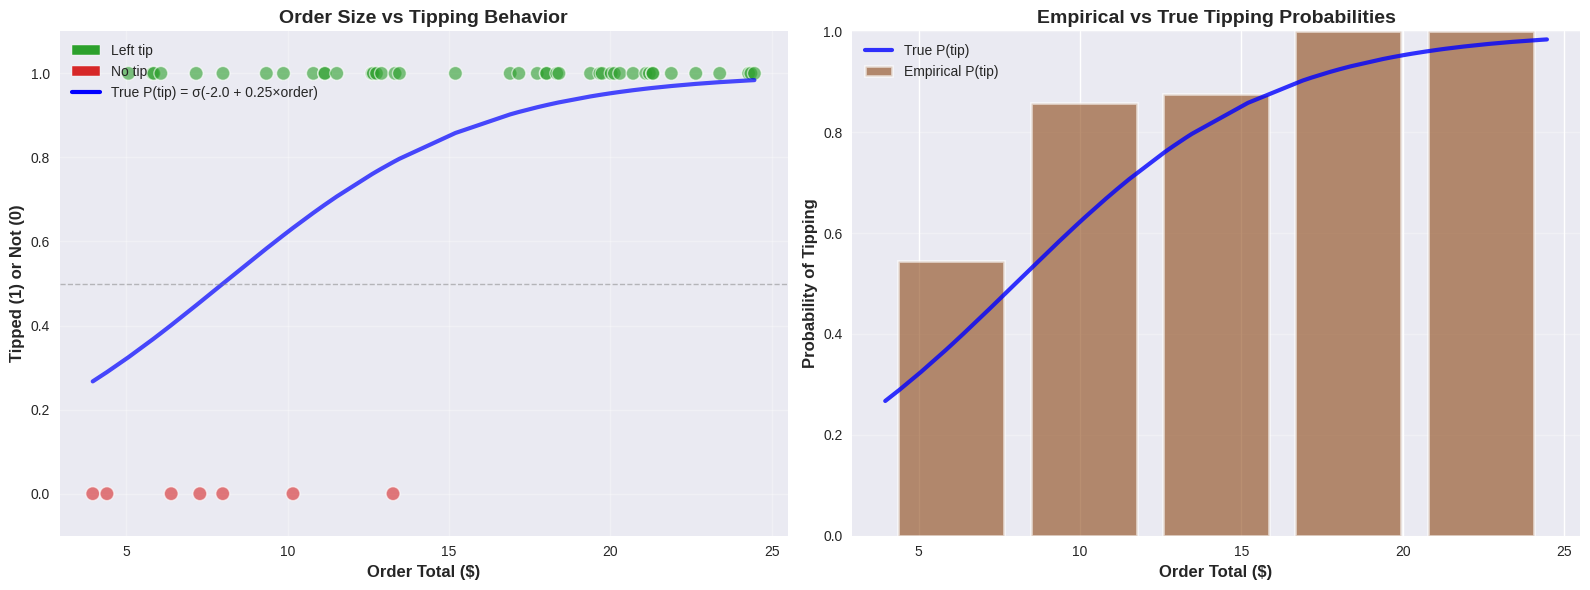

In [3]:
rng = np.random.default_rng(42)  # Create a random number generator

# Set style for prettier plots
plt.style.use("seaborn-v0_8")

# Simulate realistic coffee shop data - BINARY CASE
n_customers = 50

# Generate realistic order totals ($3 to $25)
order_totals = rng.uniform(3, 25, n_customers)
order_totals = np.sort(order_totals)  # Sort for nicer visualization

# True logistic relationship parameters
# p(tip) = 1 / (1 + exp(-(b1 + b2 * order_total)))
true_b1 = -2.0  # Intercept (bias)
true_b2 = 0.25  # Slope (effect of order size)

# Calculate true probabilities using logistic function
logits = true_b1 + true_b2 * order_totals
true_probs = 1 / (1 + np.exp(-logits))

# Generate binary outcomes based on these probabilities
tips_binary = rng.binomial(n=1, p=true_probs, size=n_customers)

print("COFFEE SHOP TIPPING ANALYSIS (BINARY)")
print("Predicting: Does customer leave a tip? (Yes=1, No=0)")
print(f"True relationship: P(tip) = σ({true_b1:.2f} + {true_b2:.2f} × Order Total)")
print(f"We collected data from {n_customers} customers")
print(f"Order range: ${order_totals.min():.2f} - ${order_totals.max():.2f}")
print(f"Tippers: {tips_binary.sum()} ({100 * tips_binary.mean():.1f}%)")
print(f"Non-tippers: {n_customers - tips_binary.sum()} ({100 * (1 - tips_binary.mean()):.1f}%)")

# Create a DataFrame for easier analysis
df = pd.DataFrame({"order_total": order_totals, "tipped": tips_binary, "true_prob": true_probs})

# Plot the binary outcome data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Binary outcomes with true probability curve
colors = ["#d62728" if t == 0 else "#2ca02c" for t in tips_binary]
ax1.scatter(
    order_totals,
    tips_binary,
    alpha=0.6,
    c=colors,
    s=100,
    edgecolor="white",
    linewidth=1,
    label="Customer behavior",
)
ax1.plot(
    order_totals,
    true_probs,
    "b-",
    linewidth=3,
    label=f"True P(tip) = σ({true_b1:.1f} + {true_b2:.2f}×order)",
    alpha=0.7,
)
ax1.axhline(y=0.5, color="gray", linestyle="--", linewidth=1, alpha=0.5)
ax1.set_xlabel("Order Total ($)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Tipped (1) or Not (0)", fontsize=12, fontweight="bold")
ax1.set_title("Order Size vs Tipping Behavior", fontsize=14, fontweight="bold")
ax1.set_ylim(-0.1, 1.1)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Add custom legend for colors
legend_elements = [
    Patch(facecolor="#2ca02c", edgecolor="white", label="Left tip"),
    Patch(facecolor="#d62728", edgecolor="white", label="No tip"),
]
ax1.legend(
    handles=[
        *legend_elements,
        plt.Line2D(
            [0],
            [0],
            color="b",
            linewidth=3,
            label=f"True P(tip) = σ({true_b1:.1f} + {true_b2:.2f}×order)",
        ),
    ],
    loc="upper left",
    fontsize=10,
)

# Right plot: Probability bins showing empirical vs true probabilities
n_bins = 5
bins = np.linspace(order_totals.min(), order_totals.max(), n_bins + 1)
bin_centers = (bins[:-1] + bins[1:]) / 2
empirical_probs = []

for i in range(n_bins):
    mask = (order_totals >= bins[i]) & (order_totals < bins[i + 1])
    if i == n_bins - 1:  # Include right edge in last bin
        mask = (order_totals >= bins[i]) & (order_totals <= bins[i + 1])
    if mask.sum() > 0:
        empirical_probs.append(tips_binary[mask].mean())
    else:
        empirical_probs.append(0)

# True probabilities at bin centers
true_probs_bins = 1 / (1 + np.exp(-(true_b1 + true_b2 * bin_centers)))

ax2.bar(
    bin_centers,
    empirical_probs,
    width=(bins[1] - bins[0]) * 0.8,
    alpha=0.6,
    color="saddlebrown",
    edgecolor="white",
    linewidth=2,
    label="Empirical P(tip)",
)
ax2.plot(order_totals, true_probs, "b-", linewidth=3, label="True P(tip)", alpha=0.8)
ax2.set_xlabel("Order Total ($)", fontsize=12, fontweight="bold")
ax2.set_ylabel("Probability of Tipping", fontsize=12, fontweight="bold")
ax2.set_title("Empirical vs True Tipping Probabilities", fontsize=14, fontweight="bold")
ax2.set_ylim(0, 1)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()


### Log loss
(target-binary-cross-entropy-loss)=
Ook hier willen we optimale waarden $\pmb{b}$ vinden, maar om die optimaliteit te bepalen maken we _geen_ gebruik van $\mathcal{L}_{SSE}$ omdat die in deze context in een heel onregelmatig patroon kan resulteren met veel lokale minima - wat nefast is, zeker als we gradient descent willen toepassen. In plaats daarvan werken we met de **_binary cross-entropy loss_** functie (ook wel **log loss** genoemd).

#### Definitie

Voor een binair classificatieprobleem wordt de cross-entropy loss voor een enkel datapunt gedefinieerd als:

$$
\mathcal{L}(\hat{y}_i, y_i) = -\left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

waarbij:
- $y_i \in \{0, 1\}$ de werkelijke binaire target waarde is
- $\hat{y}_i = \sigma(\pmb{x}_i^T\pmb{b})$ de voorspelde _waarschijnlijkheid_ is dat $y_i = 1$

Voor de volledige dataset met $n$ observaties is de totale **binary cross-entropy (BCE) loss**:

$$
\mathcal{L}_{BCE}(\pmb{b}) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

De belangrijkste eigenschappen zijn:

- Straft foute voorspellingen (meer dan SSE loss)
- Beloont juiste voorspellingen (meer dan SSE loss)
- Convex
- Elegante gradient (zie verder)


:::{note}
_Cross entropy_ is een algemene maat om de _afstand_ tussen de verdeling van twee kansvariabelen uit te drukken. We komen hierop terug in de secties over probabiliteitstheorie. 
:::

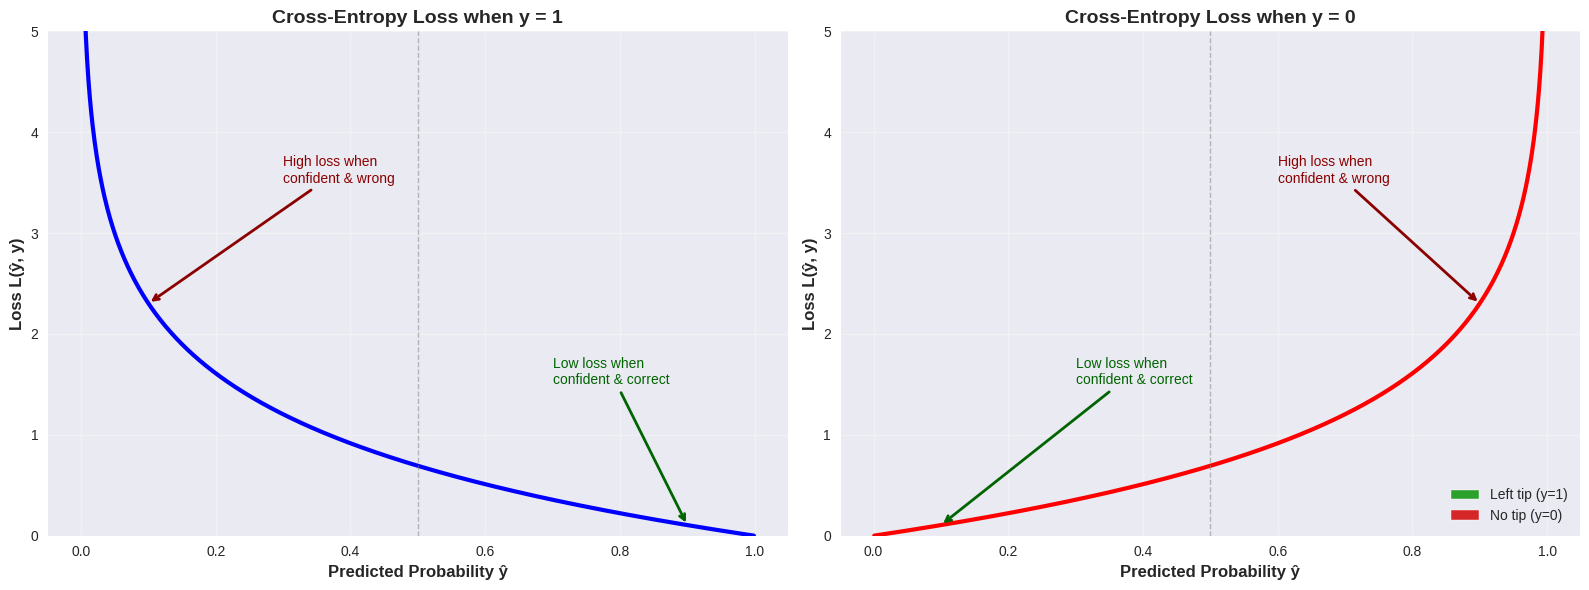

In [7]:
# Visualize the cross-entropy loss function
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Generate predicted probabilities
y_hat = np.linspace(0.001, 0.999, 1000)  # Avoid log(0)

# Case 1: True label y = 1
loss_y1 = -np.log(y_hat)
ax = axes[0]
ax.plot(y_hat, loss_y1, "b-", linewidth=3)
ax.set_xlabel("Predicted Probability ŷ", fontsize=12, fontweight="bold")
ax.set_ylabel("Loss L(ŷ, y)", fontsize=12, fontweight="bold")
ax.set_title("Cross-Entropy Loss when y = 1", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
ax.axvline(x=0.5, color="gray", linestyle="--", linewidth=1, alpha=0.5)
ax.set_ylim(0, 5)

# Add annotations
ax.annotate(
    "High loss when\nconfident & wrong",
    xy=(0.1, -np.log(0.1)),
    xytext=(0.3, 3.5),
    fontsize=10,
    color="darkred",
    arrowprops={"arrowstyle": "->", "color": "darkred", "lw": 2},
)
ax.annotate(
    "Low loss when\nconfident & correct",
    xy=(0.9, -np.log(0.9)),
    xytext=(0.7, 1.5),
    fontsize=10,
    color="darkgreen",
    arrowprops={"arrowstyle": "->", "color": "darkgreen", "lw": 2},
)

# Case 2: True label y = 0
loss_y0 = -np.log(1 - y_hat)
ax = axes[1]
ax.plot(y_hat, loss_y0, "r-", linewidth=3)
ax.set_xlabel("Predicted Probability ŷ", fontsize=12, fontweight="bold")
ax.set_ylabel("Loss L(ŷ, y)", fontsize=12, fontweight="bold")
ax.set_title("Cross-Entropy Loss when y = 0", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
ax.axvline(x=0.5, color="gray", linestyle="--", linewidth=1, alpha=0.5)
ax.set_ylim(0, 5)

# Add annotations
ax.annotate(
    "Low loss when\nconfident & correct",
    xy=(0.1, -np.log(1 - 0.1)),
    xytext=(0.3, 1.5),
    fontsize=10,
    color="darkgreen",
    arrowprops={"arrowstyle": "->", "color": "darkgreen", "lw": 2},
)
ax.annotate(
    "High loss when\nconfident & wrong",
    xy=(0.9, -np.log(1 - 0.9)),
    xytext=(0.6, 3.5),
    fontsize=10,
    color="darkred",
    arrowprops={"arrowstyle": "->", "color": "darkred", "lw": 2},
)

# Add legend
legend_elements_loss = [
    Patch(facecolor="#2ca02c", edgecolor="white", label="Left tip (y=1)"),
    Patch(facecolor="#d62728", edgecolor="white", label="No tip (y=0)"),
]
ax.legend(handles=legend_elements_loss, loc="lower right", fontsize=10)

plt.tight_layout()
plt.show()

#### Vergelijking met SSE

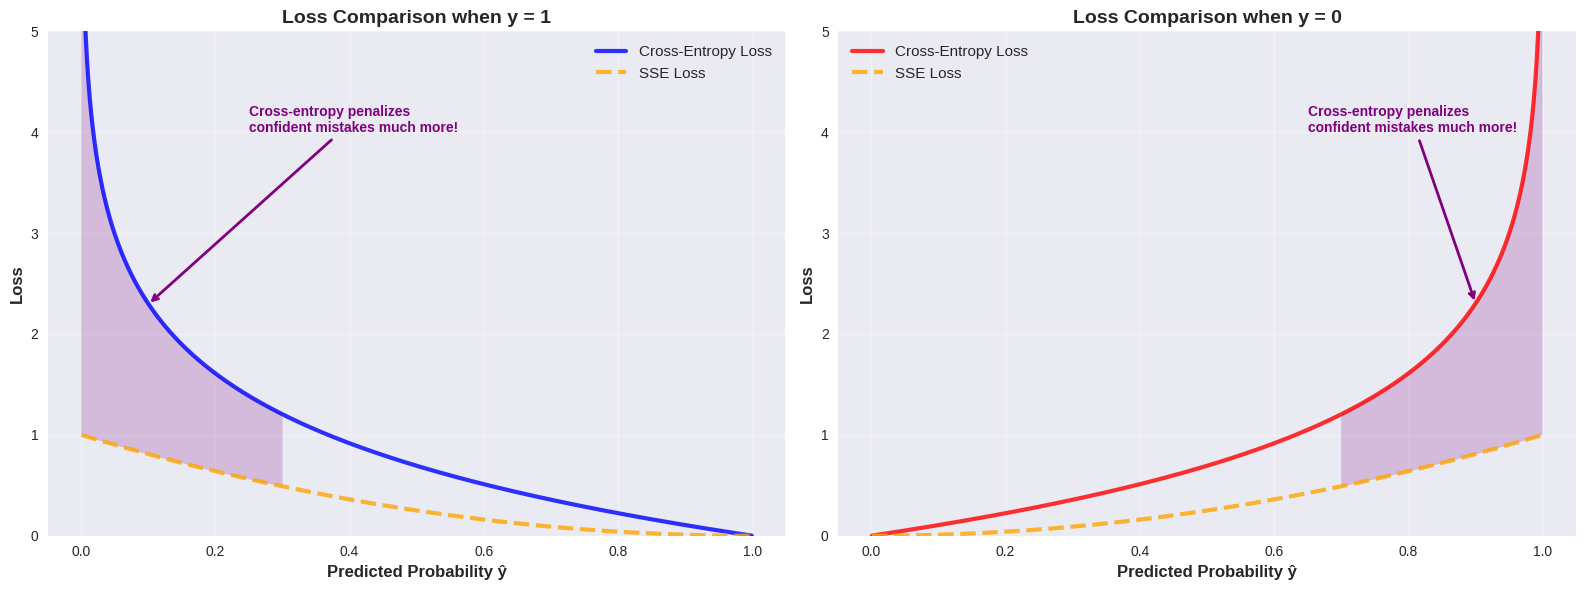

In [ ]:
# Compare SSE vs Cross-Entropy Loss
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Generate predicted probabilities
y_hat = np.linspace(0.001, 0.999, 1000)

# Cross-Entropy for both y=0 and y=1
ce_loss_y1 = -np.log(y_hat)
ce_loss_y0 = -np.log(1 - y_hat)

# SSE for both y=0 and y=1
sse_loss_y1 = (y_hat - 1) ** 2
sse_loss_y0 = (y_hat - 0) ** 2

# Left plot: y = 1 case
ax = axes[0]
ax.plot(y_hat, ce_loss_y1, "b-", linewidth=3, label="Cross-Entropy Loss", alpha=0.8)
ax.plot(y_hat, sse_loss_y1, "orange", linewidth=3, linestyle="--", label="SSE Loss", alpha=0.8)
ax.set_xlabel("Predicted Probability ŷ", fontsize=12, fontweight="bold")
ax.set_ylabel("Loss", fontsize=12, fontweight="bold")
ax.set_title("Loss Comparison when y = 1", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
ax.set_ylim(0, 5)

# Highlight the difference at extreme predictions
ax.fill_between(
    y_hat[y_hat < 0.3],
    ce_loss_y1[y_hat < 0.3],
    sse_loss_y1[y_hat < 0.3],
    alpha=0.2,
    color="purple",
    label="_nolegend_",
)
ax.annotate(
    "Cross-entropy penalizes\nconfident mistakes much more!",
    xy=(0.1, ce_loss_y1[100]),
    xytext=(0.25, 4),
    fontsize=10,
    color="purple",
    fontweight="bold",
    arrowprops={"arrowstyle": "->", "color": "purple", "lw": 2},
)

# Right plot: y = 0 case
ax = axes[1]
ax.plot(y_hat, ce_loss_y0, "r-", linewidth=3, label="Cross-Entropy Loss", alpha=0.8)
ax.plot(y_hat, sse_loss_y0, "orange", linewidth=3, linestyle="--", label="SSE Loss", alpha=0.8)
ax.set_xlabel("Predicted Probability ŷ", fontsize=12, fontweight="bold")
ax.set_ylabel("Loss", fontsize=12, fontweight="bold")
ax.set_title("Loss Comparison when y = 0", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
ax.set_ylim(0, 5)

# Highlight the difference at extreme predictions
ax.fill_between(
    y_hat[y_hat > 0.7],
    ce_loss_y0[y_hat > 0.7],
    sse_loss_y0[y_hat > 0.7],
    alpha=0.2,
    color="purple",
    label="_nolegend_",
)
ax.annotate(
    "Cross-entropy penalizes\nconfident mistakes much more!",
    xy=(0.9, ce_loss_y0[900]),
    xytext=(0.65, 4),
    fontsize=10,
    color="purple",
    fontweight="bold",
    arrowprops={"arrowstyle": "->", "color": "purple", "lw": 2},
)

plt.tight_layout()
plt.show()

#### Gradiënt van de cross-entropy loss

Een extra reden om de cross-entropy loss te gebruiken bij logistische regressie, is dat de gradiënt een zeer elegante vorm heeft. 

Voor de binary cross-entropy loss:

$$
\mathcal{L}_{BCE}(\pmb{b}) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

is de gradiënt ten opzichte van de parameters $\pmb{b}$:

$$
\frac{\partial \mathcal{L}_{BCE}}{\partial \pmb{b}} = \nabla \mathcal{L}_{BCE} = \frac{1}{n} \pmb{X}^T(\pmb{\hat{y}} - \pmb{y})
$$

waarbij

$$
\hat{y}_i = \sigma(\pmb{x}_i^T\pmb{b})
$$

:::{note}
Merk op dat we hier met een eenvoudige formule eindigen die sterk lijkt op de gradiënt van $\mathcal{L}_{SSE}$ die we in de vorige secties gebruikten:

$$
\nabla{\mathcal{L}_{SSE}} = -2\pmb{X}^T(\pmb{y} - \pmb{\hat{y}})
$$
:::

:::{note} Illustratie: Afleiding van de BCE gradiënt
:class: dropdown

Om de gradiënt van de binary cross-entropy loss te berekenen, moeten we eerst de afgeleide van de logistische functie bepalen. Dit doen we met behulp van de _quotiëntregel_.

##### De quotiëntregel

Voor een functie van de vorm $f(x) = \frac{g(x)}{h(x)}$, is de afgeleide:

$$
f'(x) = \frac{g'(x) \cdot h(x) - g(x) \cdot h'(x)}{[h(x)]^2}
$$

##### Afgeleide van de logistische functie

De logistische functie is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

We kunnen dit schrijven als $\sigma(z) = \frac{g(z)}{h(z)}$ waarbij $g(z) = 1$ en $h(z) = 1 + e^{-z}$.
  
De afzonderlijke afgeleiden zijn:

$$
\begin{align}
g(z)' &= 0 \cr
h(z)' &= -e^{-z}
\end{align}
$$
  
Nu passen we de quotiëntregel toe:

$$
\begin{align}
\sigma(z)' &= \frac{g'(z) \cdot h(z) - g(z) \cdot h'(z)}{[h(z)]^2} \cr
&= \frac{0 \cdot (1 + e^{-z}) - 1 \cdot (-e^{-z})}{(1 + e^{-z})^2} \cr
&= \frac{e^{-z}}{(1 + e^{-z})^2} \cr
&= \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}} \cr
&= \frac{1}{1 + e^{-z}} \cdot \frac{1 + e^{-z} - 1}{1 + e^{-z}} \cr
&= \frac{1}{1 + e^{-z}} \cdot \left(1 - \frac{1}{1 + e^{-z}}\right) \cr
&= \sigma(z) \cdot (1 - \sigma(z))
\end{align}
$$

Dit is een zeer elegante eigenschap: _de afgeleide van de sigmoid functie kan worden uitgedrukt in termen van zichzelf_!

##### Partiële afgeleide van de loss functie

Voor een enkel datapunt is de loss:

$$
\mathcal{L} = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$

waarbij $\hat{y} = \sigma(z)$ en $z = \pmb{x}^T\pmb{b}$.

We willen $\frac{\partial \mathcal{L}}{\partial b_j}$ berekenen. Met de kettingregel:

$$
\frac{\partial \mathcal{L}}{\partial b_j} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial b_j}
$$

**Stap 1:** Bereken $\frac{\partial \mathcal{L}}{\partial \hat{y}}$:

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial \hat{y}} &= -\left[\frac{y}{\hat{y}} + (1-y) \cdot \frac{-1}{1-\hat{y}}\right] \cr
&= -\left[\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}}\right] \cr
&= -\frac{y(1-\hat{y}) - (1-y)\hat{y}}{\hat{y}(1-\hat{y})} \cr
&= -\frac{y - y\hat{y} - \hat{y} + y\hat{y}}{\hat{y}(1-\hat{y})} \cr
&= -\frac{y - \hat{y}}{\hat{y}(1-\hat{y})}
\end{align}
$$

**Stap 2:** We weten dat $\frac{\partial \hat{y}}{\partial z} = \sigma(z)(1 - \sigma(z)) = \hat{y}(1-\hat{y})$

**Stap 3:** Bereken $\frac{\partial z}{\partial b_j}$:

$$
\frac{\partial z}{\partial b_j} = \frac{\partial}{\partial b_j}(\pmb{x}^T\pmb{b}) = x_j
$$

Combineer alle delen:

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial b_j} &= -\frac{y - \hat{y}}{\hat{y}(1-\hat{y})} \cdot \hat{y}(1-\hat{y}) \cdot x_j \cr
&= -(y - \hat{y}) \cdot x_j \cr
&= (\hat{y} - y) \cdot x_j
\end{align}
$$

Voor de volledige dataset met $n$ observaties:

$$
\nabla \mathcal{L}_{BCE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) x_{ij}
$$

In vectorvorm krijgen we de gradiënt:

$$
\nabla \mathcal{L}_{BCE} = \frac{1}{n} \pmb{X}^T(\pmb{\hat{y}} - \pmb{y})
$$

Deze elegante uitdrukking is identiek aan de gradiënt voor lineaire regressie met SSE loss (op een factor na).
:::

### Gradient descent
Er wijzigt niets aan de definitie van het gradient descent leeralgoritme. We gebruiken nu gewoon de gradiënt van de $BCE$ _loss_ functie.  

$$
\begin{align}
\pmb{b}^{k+1} &= \pmb{b}^k - \lambda \nabla \mathcal{L}(\pmb{b}^k) \cr
&= \pmb{b}^k - \lambda \nabla \mathcal{L}_{BCE}(\pmb{b}^k)
\end{align}
$$

In [ ]:
# Gradient Descent for Logistic Regression
def sigmoid(z):
    """Logistic (sigmoid) function."""
    return 1 / (1 + np.exp(-z))


def bce_loss(X, y, b):
    """Binary Cross-Entropy Loss."""
    y_hat = sigmoid(X @ b)
    # Add small epsilon to avoid log(0)
    epsilon = 1e-10
    loss = -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))
    return loss


def gradient_bce(X, y, b):
    """Gradient of BCE loss with respect to parameters b."""
    y_hat = sigmoid(X @ b)
    return (1 / len(y)) * X.T @ (y_hat - y)


learning_rate = 0.01
max_iterations = 50000

X = np.column_stack([np.ones(n_customers), order_totals])
y = tips_binary

# Initialize parameters
n_features = X.shape[1]
b = np.zeros(n_features)

# History tracking
b_history = [b.copy()]
loss_history = [bce_loss(X, y, b)]

for iteration in range(max_iterations):
    # Compute gradient
    grad = gradient_bce(X, y, b)

    # Update parameters
    b = b - learning_rate * grad

    # Store history
    b_history.append(b.copy())
    current_loss = bce_loss(X, y, b)
    loss_history.append(current_loss)

if iteration == max_iterations - 1:
    print(f"Reached maximum iterations ({max_iterations})")


results = {
    "b_history": b_history,
    "loss_history": loss_history,
    "final_b": b_history[-1],
    "final_loss": loss_history[-1],
}

print(f"Final parameters: b₀ = {results['final_b'][0]:.3f}, b₁ = {results['final_b'][1]:.3f}")
print(f"True parameters:  b₀ = {true_b1:.3f}, b₁ = {true_b2:.3f}")
print(f"Final loss: {results['final_loss']:.4f}")
print(f"Number of iterations: {len(results['loss_history']) - 1}")

Reached maximum iterations (50000)
Final parameters: b₀ = -1.909, b₁ = 0.336
True parameters:  b₀ = -2.000, b₁ = 0.250
Final loss: 0.2738
Number of iterations: 50000


In [ ]:
px.line(
    x=np.arange(len(loss_history)),
    y=loss_history,
    labels={"x": "Iteration", "y": "BCE Loss"},
    title="BCE Loss Over Iterations",
    height=400,
    width=700,
).show()